In [666]:
import numpy as np

# TEST WITH IRIS


In [667]:
# # Read csv file
# import pandas as pd
# data = pd.read_csv('Iris.csv')
# data.head()

In [668]:
# change = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
# data['Species'] = data['Species'].map(change)
# data.head()

In [669]:
# import neural_network as nn
# import numpy as np

# # Create a neural network with 4 input neurons, 3 hidden neurons, and 3 output neuron
# mynetwork = nn.NeuralNetwork(4, 3)
# mynetwork.add_hidden_layer(4)
# mynetwork.create_weight_matrix()
# mynetwork.create_bias_matrix()

# # Split data into training and testing
# from sklearn.model_selection import train_test_split
# X = data.drop(['Species', 'Id'], axis=1)
# y = data['Species']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [670]:
# mynetwork.bias_matrix

In [671]:
# # Train the neural network
# y_0 = np.eye(3)[y_train.iloc[0]]
# x_0 = X_train.iloc[0]

# output_layer = mynetwork.feed_forward(x_0)
# print("Output Feedforward",output_layer)
# backprop_error = mynetwork.backpropagation(y_0, output_layer)

# TEST VECTORIZATION MODE


In [672]:
# Read csv file
import pandas as pd
data = pd.read_csv('Iris.csv')
data.head()

change = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
data['Species'] = data['Species'].map(change)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [673]:
import neural_network as nn
import numpy as np

# Create a neural network with 4 input neurons, 3 hidden neurons, and 3 output neuron
myNN = nn.NeuralNetwork(4, 3)
myNN.add_hidden_layer(1)
myNN.init()

# Split data into training and testing
from sklearn.model_selection import train_test_split
X = data.drop(['Species', 'Id'], axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



----  Weight Matrix 0  ----
Shape:  (1, 4)
Size:  4
Dimension:  2
isNumpy:  True
Data:  [[-0.54583154 -0.83910831 -0.49609487 -0.58740754]]


----  Weight Matrix 1  ----
Shape:  (3, 1)
Size:  3
Dimension:  2
isNumpy:  True
Data:  [[-0.45962311]
 [ 0.93171692]
 [ 0.32693668]]


----  Bias Matrix 0  ----
Shape:  (1, 1)
Size:  1
Dimension:  2
isNumpy:  True
Data:  [[-0.53845664]]


----  Bias Matrix 1  ----
Shape:  (3, 1)
Size:  3
Dimension:  2
isNumpy:  True
Data:  [[0.90805517]
 [0.39950856]
 [0.55665758]]




In [674]:
output = myNN.feedforward_vectorization_mode(X_train.iloc[0])
myNN.print_info(output, "Output")

----  Output  ----
Shape:  (3, 1)
Size:  3
Dimension:  2
isNumpy:  True
Data:  [[0.43381795]
 [0.26089549]
 [0.30528656]]




In [675]:
# print("len of hidden layer", len(myNN.hidden_layer))
# for i in myNN.hidden_layer:
#     myNN.print_info(i, "hidden_layer")

In [676]:
myNN.backpropagation_vectorization_mode(myNN.one_hot_encode(y_train.iloc[0]), output)

1.186504408824878

In [677]:
result = myNN.train_vectorization_mode(X_train.iloc[0], y_train.iloc[0], 1000, 0.001)

Input Data:  SepalLengthCm    6.4
SepalWidthCm     3.1
PetalLengthCm    5.5
PetalWidthCm     1.8
Name: 137, dtype: float64
Target Data:  [0. 0. 1.]
Epoch  0 Error:  6.7304976943211745
Epoch  1 Error:  6.730434290584592
Epoch  2 Error:  6.730370882733623
Epoch  3 Error:  6.730307469391757
Epoch  4 Error:  6.7302440491288475
Epoch  5 Error:  6.730180620458988
Epoch  6 Error:  6.730117181838328
Epoch  7 Error:  6.730053731662785
Epoch  8 Error:  6.72999026826567
Epoch  9 Error:  6.729926789915233
Epoch  10 Error:  6.729863294812093
Epoch  11 Error:  6.72979978108658
Epoch  12 Error:  6.729736246795975
Epoch  13 Error:  6.729672689921622
Epoch  14 Error:  6.729609108365953
Epoch  15 Error:  6.729545499949381
Epoch  16 Error:  6.729481862407072
Epoch  17 Error:  6.729418193385587
Epoch  18 Error:  6.729354490439416
Epoch  19 Error:  6.729290751027334
Epoch  20 Error:  6.729226972508659
Epoch  21 Error:  6.7291631521393285
Epoch  22 Error:  6.729099287067848
Epoch  23 Error:  6.7290353743310

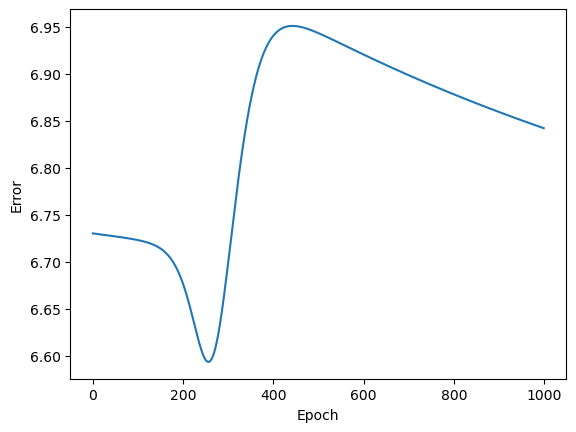

In [678]:
#plot history into line chart
import matplotlib.pyplot as plt
plt.plot(result)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

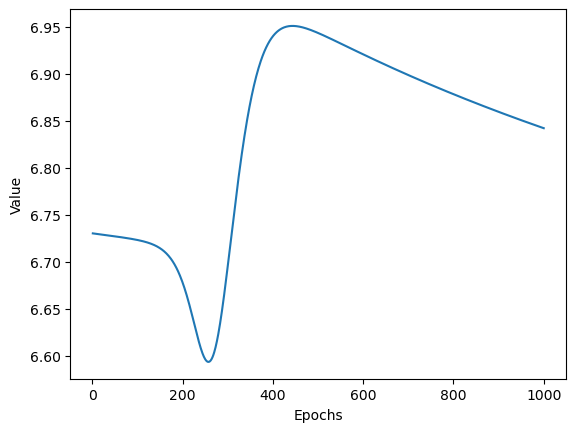

In [679]:
# make line graph for error
import matplotlib.pyplot as plt
# Generate epochs
epochs = range(1, len(result) + 1)
plt.plot(epochs, result)
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.show()

In [680]:
output = myNN.feedforward_vectorization_mode(X_train.iloc[0])
myNN.print_info(output, "Output")

----  Output  ----
Shape:  (3, 1)
Size:  3
Dimension:  2
isNumpy:  True
Data:  [[0.21887835]
 [0.4475516 ]
 [0.33357005]]




In [681]:
# print("Output", output)
# print output in decimal 5 places
for i in output:
    # print("{:.5f}".format(i[0]))
    print(i)
print(np.argmax(output))
print(y_train.iloc[0]) 

[0.21887835]
[0.4475516]
[0.33357005]
1
2


In [682]:
myNN.categorical_crossentropy_loss(myNN.one_hot_encode(y_train.iloc[0]),output)

array([[-0.        ],
       [-0.        ],
       [-1.09790239]])

In [683]:
def categorical_crossentropy_loss(y_true, y_pred):
          # Calculate cross-entropy loss
            predict = np.clip(y_pred, 1e-15, 1 - 1e-15)
            loss = -np.sum(y_true * np.log(predict), axis=0)
            return loss

print(categorical_crossentropy_loss(y_train.iloc[0], output))

[6.84221003]


In [684]:
a = np.array([[1, 2, 3],[1,2,3]])
b = np.array([[4, 5, 6]])

a1 = np.array([0., 0., 1.])
b1 = np.array([0.1, 0.5, 0.4])
entropy = -a1 * np.log(b1)
# dont sum the entropy
print(entropy)

[0.         0.         0.91629073]


# Test Batch


In [6]:
# Read csv file
import pandas as pd
data = pd.read_csv('Iris.csv')
data.head()

change = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
data['Species'] = data['Species'].map(change)
data.head()


import neural_network as nn
import numpy as np

# Create a neural network with 4 input neurons, 3 hidden neurons, and 3 output neuron
myNN = nn.NeuralNetwork(4, 3)
myNN.add_hidden_layer(1)
myNN.init()

# Split data into training and testing
from sklearn.model_selection import train_test_split
X = data.drop(['Species', 'Id'], axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



----  Weight Matrix 0  ----
Shape:  (1, 4)
Size:  4
Dimension:  2
isNumpy:  True
Data:  [[ 0.26108106  0.96265625 -0.40767677 -0.4054786 ]]


----  Weight Matrix 1  ----
Shape:  (3, 1)
Size:  3
Dimension:  2
isNumpy:  True
Data:  [[-0.37229979]
 [ 0.36319383]
 [-0.04128716]]


----  Bias Matrix 0  ----
Shape:  (1, 1)
Size:  1
Dimension:  2
isNumpy:  True
Data:  [[0.69820125]]


----  Bias Matrix 1  ----
Shape:  (3, 1)
Size:  3
Dimension:  2
isNumpy:  True
Data:  [[-0.26865367]
 [ 0.74961912]
 [ 0.11661439]]




In [7]:
X_train.shape[0]

120

In [8]:
history = myNN.train(X_train, y_train, 100, 0.001)


Epoch  0 Error:  4.174132705392541
Epoch  1 Error:  4.173640530574734
Epoch  2 Error:  4.173144222346854
Epoch  3 Error:  4.172647860204212
Epoch  4 Error:  4.1721514824254085
Epoch  5 Error:  4.171655093531951
Epoch  6 Error:  4.171158697775807
Epoch  7 Error:  4.170662299419008
Epoch  8 Error:  4.170165902735759
Epoch  9 Error:  4.169669512012251
Epoch  10 Error:  4.169173131546419
Epoch  11 Error:  4.168676765647737
Epoch  12 Error:  4.168180418636961
Epoch  13 Error:  4.167684094845929
Epoch  14 Error:  4.167187798617319
Epoch  15 Error:  4.1666915343044275
Epoch  16 Error:  4.1661953062709385
Epoch  17 Error:  4.165699118890673
Epoch  18 Error:  4.165202976547402
Epoch  19 Error:  4.164706883634569
Epoch  20 Error:  4.164210844555085
Epoch  21 Error:  4.1637148637210935
Epoch  22 Error:  4.163218945553722
Epoch  23 Error:  4.162723094482867
Epoch  24 Error:  4.162227314946948
Epoch  25 Error:  4.16173161139268
Epoch  26 Error:  4.161235988274831
Epoch  27 Error:  4.160740450055992

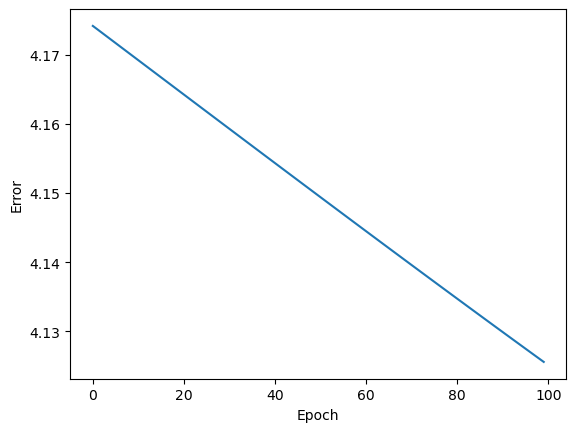

In [9]:
# plot history into line chart
import matplotlib.pyplot as plt
plt.plot(history)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [12]:
# predict the output
output = myNN.feedforward_vectorization_mode(X_train.iloc[5])
print("Output", output)
print(np.argmax(output))
print(y_train.iloc[5])

Output [[0.12166109]
 [0.63615934]
 [0.24217957]]
1
1
